<a href="https://colab.research.google.com/github/nokib-101/cse424/blob/main/424_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf

In [ ]:
sp500 = yf.Ticker("^GSPC")

In [ ]:
sp500 = sp500.history(period ="max")

In [ ]:
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,0.0,0.0
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,0.0,0.0
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,0.0,0.0


In [ ]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-04-18 00:00:00-04:00', '2024-04-19 00:00:00-04:00',
               '2024-04-22 00:00:00-04:00', '2024-04-23 00:00:00-04:00',
               '2024-04-24 00:00:00-04:00', '2024-04-25 00:00:00-04:00',
               '2024-04-26 00:00:00-04:00', '2024-04-29 00:00:00-04:00',
               '2024-04-30 00:00:00-04:00', '2024-05-01 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24199, freq=None)

<Axes: xlabel='Date'>

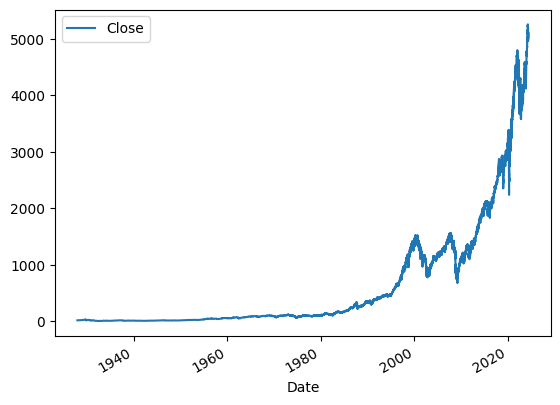

In [ ]:
# plotting in dataframe
# in y keeping closing value
# in x keeping the time
sp500.plot.line(y="Close",use_index = True)



In [ ]:
# removing dividens & stock splitts column
del sp500["Dividends"]
del sp500["Stock Splits"]

In [ ]:
sp500

,Open,High,Low,Close,Volume
Date,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0
...,...,...,...,...,...
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000


In [ ]:
# creating a column named tomorrow
sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941


In [ ]:
# Setting Target to check if tommorow's price is bigger than today's price

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)


In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941,0


In [ ]:
# taking data from only 1990 january
sp500 =sp500.loc["1990-01-01":].copy()

In [ ]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1
2024-04-29 00:00:00-04:00,5114.129883,5123.490234,5088.649902,5116.169922,3447450000,5035.689941,0


In [ ]:
#importing model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators =100, min_samples_split=100, random_state =1)

train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close","Volume","Open","High","Low"]
model.fit(train[predictors], train["Target"])


RandomForestClassifier(min_samples_split=100, random_state=1)

In [ ]:
# measuring precision
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

import pandas as pd

preds = pd.Series(preds, index = test.index)

precision_score(test["Target"],preds)

1.0

<Axes: xlabel='Date'>

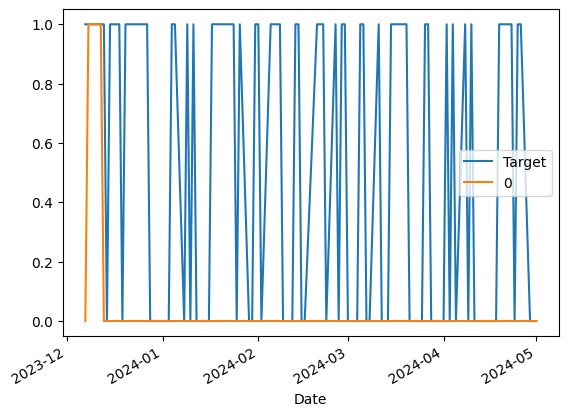

In [ ]:
#plotting prediction & actual result
# orange line predictions Blue actual
combined = pd.concat([test["Target"],preds],axis =1)

combined.plot()

In [ ]:
def predict(train, test , predictors, model):

  model.fit(train[predictors],train["Target"])
  preds = model.predict(test[predictors])

  preds = pd.Series(preds, index= test.index , name ="Predictions")

  combined = pd.concat([test["Target"],preds], axis=1)

  return combined


In [ ]:
def backtest(data,model,predictors,start=2500,step =250):

  all_predictions = []

  for i in range(start,data.shape[0], step):

    train = data.iloc[0:i].copy()
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)

  return pd.concat(all_predictions)



In [ ]:
predictions = backtest(sp500, model, predictors)

In [ ]:
predictions["Predictions"].value_counts()

Predictions
0    2389
1     111
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5855855855855856

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.55
0    0.45
Name: count, dtype: float64

In [ ]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()

    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]

    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]

    new_predictors+= [ratio_column, trend_column]

In [ ]:
sp500 = sp500.dropna()

In [ ]:
sp500


,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-24 00:00:00-04:00,5084.859863,5089.479980,5047.020020,5071.629883,3656740000,5048.419922,0,1.000106,2.0,1.009033,3.0,0.995752,30.0,1.102869,137.0,1.226735,531.0
2024-04-25 00:00:00-04:00,5019.879883,5057.750000,4990.580078,5048.419922,3958050000,5099.959961,1,0.997707,1.0,1.002927,3.0,0.990795,30.0,1.096950,136.0,1.220477,530.0
2024-04-26 00:00:00-04:00,5084.649902,5114.620117,5073.140137,5099.959961,3604140000,5116.169922,1,1.005079,1.0,1.007851,4.0,1.000078,31.0,1.107254,136.0,1.232267,531.0


In [ ]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [ ]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [ ]:
predictions["Predictions"].value_counts()

Predictions
0    2389
1     111
Name: count, dtype: int64

In [ ]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5855855855855856

In [ ]:
predictions["Target"].value_counts() / predictions.shape[0]

Target
1    0.55
0    0.45
Name: count, dtype: float64

In [ ]:
predictions

,Target,Predictions
Date,,
2023-12-07 00:00:00-05:00,1,0
2023-12-08 00:00:00-05:00,1,0
2023-12-11 00:00:00-05:00,1,0
2023-12-12 00:00:00-05:00,1,0
2023-12-13 00:00:00-05:00,1,0
...,...,...
2024-04-25 00:00:00-04:00,1,0
2024-04-26 00:00:00-04:00,1,0
2024-04-29 00:00:00-04:00,0,0


from matplotlib import pyplot as plt
predictions['Target'].plot(kind='hist', bins=20, title='Target')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions.plot(kind='scatter', x='Target', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
predictions['Target'].plot(kind='line', figsize=(8, 4), title='Target')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
predictions['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)